Load modules/packages.

In [1]:
import pygam
import pandas
import numpy
import numpy.random
import seaborn
import matplotlib.pyplot 
import vtreat
import vtreat.util
import wvpy.util

Generate example data.

In [2]:
d = pandas.DataFrame({'x':[0.1*i for i in range(200)]})
d['y'] = numpy.sin(d['x']) + 0.1*numpy.random.normal(size=d.shape[0])
d['xc'] = ['level_' + str(5*numpy.round(yi/5, 1)) for yi in d['y']]
d['yc']= d['y']>0.5
d.head()

,x,y,xc,yc
0,0.0,0.109716,level_0.0,False
1,0.1,-0.025586,level_-0.0,False
2,0.2,0.160324,level_0.0,False
3,0.3,0.483917,level_0.5,False
4,0.4,0.412295,level_0.5,False


In [3]:
numpy.mean(d['yc'])

0.32

Build a classification model.

In [4]:
transform = vtreat.BinomialOutcomeTreatment(
    outcome_name='yc', 
    outcome_target=True,
    cols_to_copy=['y'])

In [5]:
d_prepared = transform.fit_transform(d, d['yc'])
d_prepared.head()

,y,yc,x,xc_logit_code,xc_prevalence_code,xc_lev_level_0.5,xc_lev_level_-1.0,xc_lev_level_1.0,xc_lev_level_-0.5
0,0.109716,False,0.0,-5.579391,0.075,0,0,0,0
1,-0.025586,False,0.1,-5.630339,0.065,0,0,0,0
2,0.160324,False,0.2,-5.579391,0.075,0,0,0,0
3,0.483917,False,0.3,0.425959,0.250,1,0,0,0
4,0.412295,False,0.4,0.358128,0.250,1,0,0,0


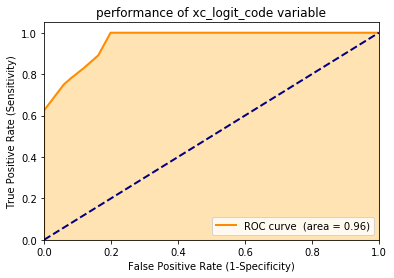

0.9610523897058824

In [6]:
wvpy.util.plot_roc(prediction=d_prepared['xc_logit_code'], 
                   istrue=d_prepared['yc'],
                   title = 'performance of xc_logit_code variable')